In [45]:
import darkdetect
import numpy as np
from matplotlib import pyplot as plt, animation

from dynamic_iteration.gauss_seidel import gauss_seidel

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
plt.rcParams.update({
    "text.usetex": True,
    "animation.html": "jshtml"
})

## Problem definition

In [47]:
g = 9.81
l = 1

In [48]:
def f1(y1: float, y2: float) -> np.array:
    return y2


def f2(y1: float, y2: float) -> np.array:
    return -g/l * np.sin(y1)

## Simulation parameters

In [49]:
kmax = 5                    # Amount of iterations
n = 200                     # Time steps
T = 4*np.pi*np.sqrt(l/g)    # Time interval
t = np.linspace(0, T, n)
dyn_iter_solver = gauss_seidel

## Solution
### Solve dynamic iteration

In [50]:
theta,_ = dyn_iter_solver(t, [np.pi/2,0], kmax, f1, f2)

In [51]:
x = l*np.sin(theta)
y = -l*np.cos(theta)

### Animate pendulum

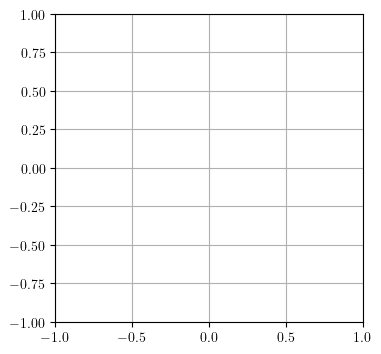

In [52]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-l, l), ylim=(-l, l))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

In [53]:
def animate(i):
    xi = [0, x[i]]
    yi = [0, y[i]]

    history_x = x[:i]
    history_y = y[:i]

    line.set_data(xi, yi)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % t[i])
    return line, trace, time_text

In [54]:
animation.FuncAnimation(fig, animate, frames=theta.size, interval=30)